In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
girls = pd.read_csv(r'C:\projects\Python\mlcourse_open\Lesson2\girls.csv')


In [3]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


In [5]:
girls.describe(include = 'all')

,Month,Year,Bust,Waist,Hips,Height,Weight
count,604,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN
top,December,NaN,NaN,NaN,NaN,NaN,NaN
freq,54,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,NaN,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,NaN,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,NaN,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,NaN,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,NaN,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000


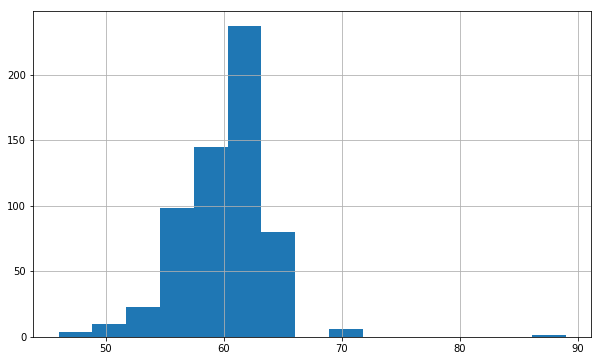

In [6]:
girls['Waist'].hist(bins=15);

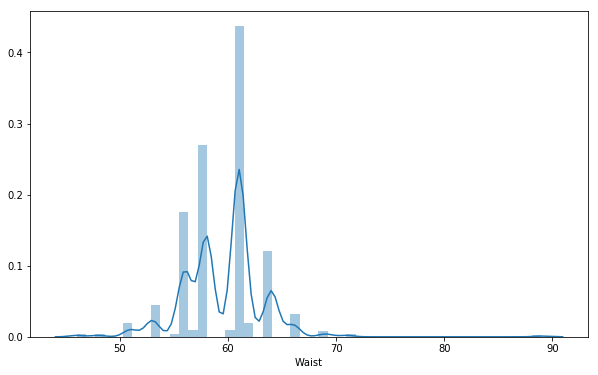

In [7]:
sns.distplot(girls['Waist'], kde=True);

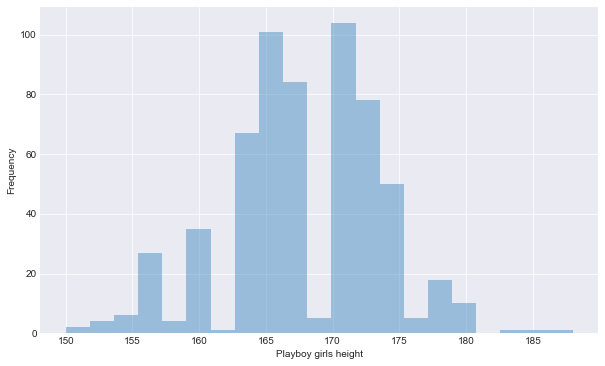

In [10]:
ax = sns.distplot(girls['Height'], kde = False)
ax.set(xlabel='Playboy girls height', ylabel='Frequency')
sns.set_style('darkgrid')



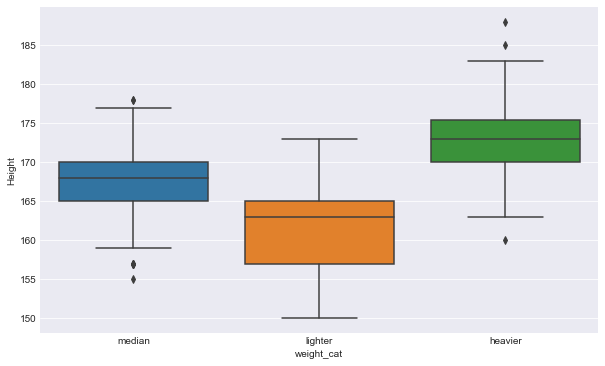

In [11]:
def weight_category(weight):
    return 'heavier' if weight > 54\
            else 'lighter' if weight < 49 else 'median'

girls['weight_cat'] = girls['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=girls);



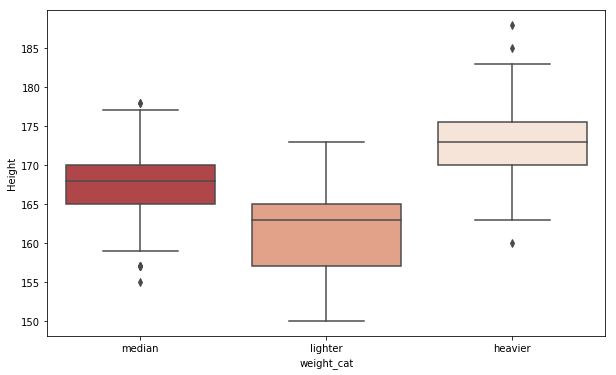

In [12]:
girls['weight_cat'] = girls['Weight'].apply(lambda weight: 'heavier' if weight > 54
                                                                else 'lighter' if weight < 49
                                                                else 'median')
sns.boxplot(x = 'weight_cat', y = 'Height', data = girls);

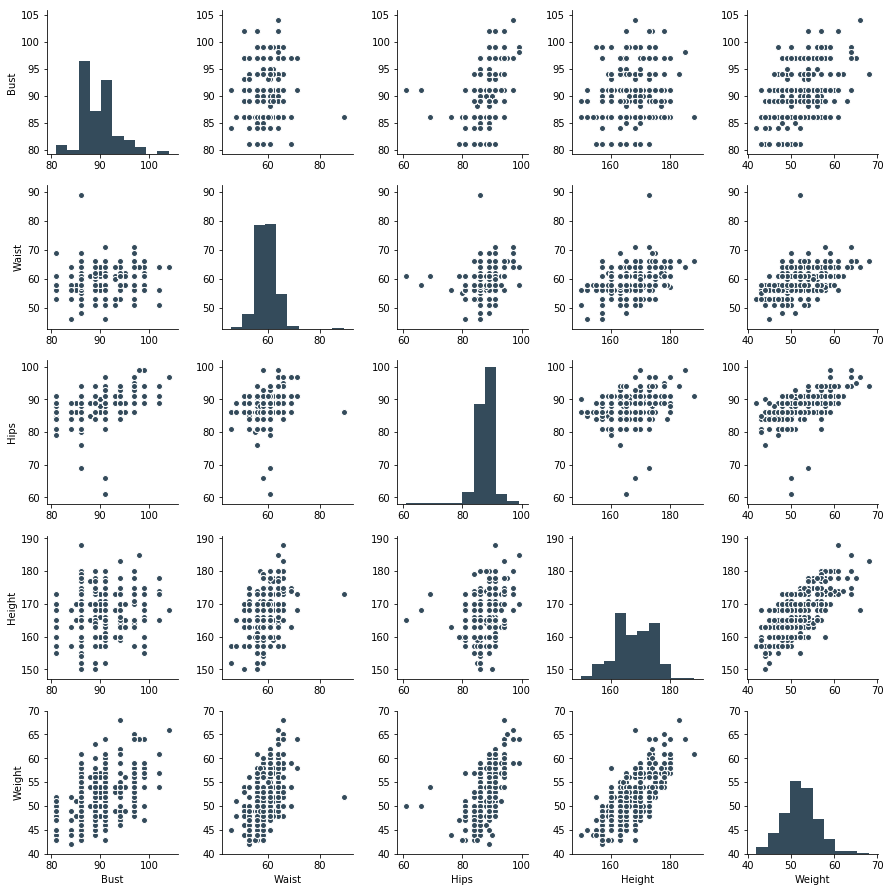

In [15]:
sns.set_palette(sns.color_palette("Blues_d"))
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']]);



In [6]:
girls.corr()

,Year,Bust,Waist,Hips,Height,Weight
Year,1.000000,-0.461384,0.314772,-0.310939,0.306172,-0.005168
Bust,-0.461384,1.000000,0.062017,0.455448,0.090848,0.408590
Waist,0.314772,0.062017,1.000000,0.287631,0.374636,0.468535
Hips,-0.310939,0.455448,0.287631,1.000000,0.231788,0.549841
Height,0.306172,0.090848,0.374636,0.231788,1.000000,0.709458
Weight,-0.005168,0.408590,0.468535,0.549841,0.709458,1.000000


In [8]:
girls['Height'].head(15)

0     165
1     168
2     166
3     166
4     157
5     170
6     166
7     160
8     157
9     165
10    170
11    157
12    175
13    165
14    165
Name: Height, dtype: int64

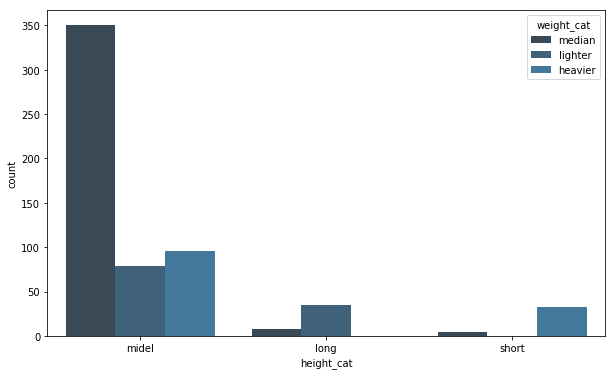

In [16]:
girls['height_cat'] = girls['Height'].apply(lambda height: 'long' if height < 160
                                                                  else 'short' if height > 175
                                                                  else 'midel')
sns.countplot(x = 'height_cat', hue = 'weight_cat', data = girls);

In [17]:
pd.crosstab(girls['weight_cat'], girls['height_cat'])



height_cat,long,midel,short
weight_cat,,,
heavier,0,96,32
lighter,35,79,0
median,8,350,4


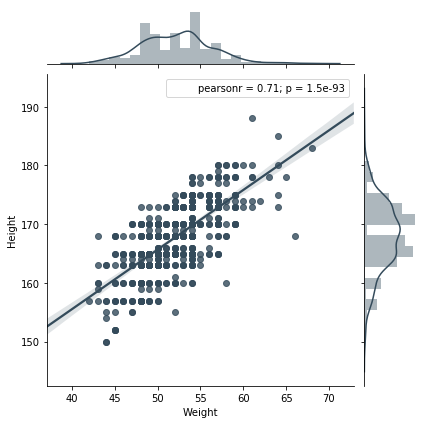

In [18]:
sns.jointplot(x='Weight', y='Height', 
              data=girls, kind='reg');